# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></div><div class="lev1 toc-item"><a href="#import-packages" data-toc-modified-id="import-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import packages</a></div><div class="lev2 toc-item"><a href="#basic-stuff" data-toc-modified-id="basic-stuff-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>basic stuff</a></div><div class="lev2 toc-item"><a href="#keras-stuff" data-toc-modified-id="keras-stuff-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>keras stuff</a></div><div class="lev1 toc-item"><a href="#Load-log-files" data-toc-modified-id="Load-log-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load log files</a></div><div class="lev1 toc-item"><a href="#Exploring-encodings" data-toc-modified-id="Exploring-encodings-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring encodings</a></div><div class="lev2 toc-item"><a href="#Load-JSON-files" data-toc-modified-id="Load-JSON-files-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load JSON files</a></div><div class="lev2 toc-item"><a href="#Visualize-encoded-data" data-toc-modified-id="Visualize-encoded-data-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Visualize encoded data</a></div>

# Summary
Exploring and visualizing some of the results of the two auto-encoder trainings

# import packages

## basic stuff

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## keras stuff

In [3]:
from keras import backend as K

from keras.layers import Input, Dense, Conv2D, MaxPooling2D
from keras.layers import Reshape, Flatten, UpSampling2D
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers

from keras.datasets import mnist

Using TensorFlow backend.


# Load log files

In [4]:
log_filenames = [x for x in os.listdir('.') if '.log' in x]

In [5]:
log_filenames

['autoencoders_clean.log',
 'regularized_convolutional_ae_20170719-020714.log',
 'simple_convolutional_ae_20170719-012829.log']

`autoencoders_clean.log` is big and doesn't really tell us all that much unless an error happened in the training. We'll actually be using the other two. 

In [6]:
training_log_names = log_filenames[1:]
print(training_log_names)

['regularized_convolutional_ae_20170719-020714.log', 'simple_convolutional_ae_20170719-012829.log']


In [7]:
training_logs = {}
for logname in training_log_names:
    training_logs[logname.split('_')[0]] = pd.read_csv(logname, index_col='epoch')

In [8]:
for key, value in training_logs.items():
    print(key)

regularized
simple


In [9]:
training_logs['simple'].head()

,acc,loss,mean_squared_error,val_acc,val_loss,val_mean_squared_error
epoch,,,,,,
0,0.790223,0.240263,0.060197,0.789143,0.179732,0.040657
1,0.797488,0.167334,0.036259,0.799709,0.153892,0.031607
2,0.800940,0.152529,0.030988,0.800577,0.144797,0.028393
3,0.802910,0.143640,0.027817,0.799940,0.139991,0.026777
4,0.804212,0.138359,0.025955,0.804822,0.132349,0.023913


In [10]:
training_logs['regularized'].head()

,acc,loss,mean_squared_error,val_acc,val_loss,val_mean_squared_error
epoch,,,,,,
0,0.799121,0.316849,0.080953,0.807242,0.265862,0.068240
1,0.807712,0.268491,0.068383,0.805790,0.264439,0.067911
2,0.806897,0.266091,0.067931,0.805882,0.263723,0.067721
3,0.806045,0.265052,0.067724,0.805882,0.263616,0.067705
4,0.805369,0.264529,0.067611,0.805258,0.263418,0.067635


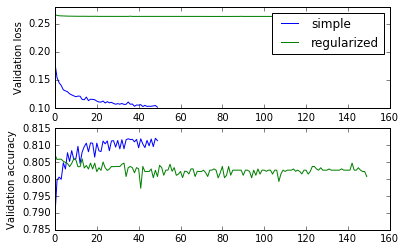

In [11]:
plt.subplot(211);
plt.plot(training_logs['simple']['val_loss'], label='simple');
plt.plot(training_logs['regularized']['val_loss'], label='regularized');
plt.ylabel('Validation loss')
plt.legend();
plt.subplot(212);
plt.plot(training_logs['simple']['val_acc']);
plt.plot(training_logs['regularized']['val_acc']);
plt.ylabel('Validation accuracy');

Something is going seriously wrong here. 

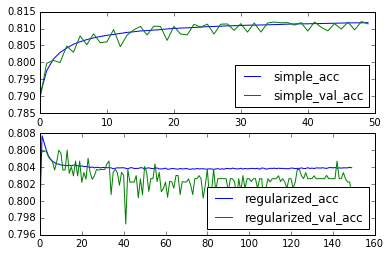

In [12]:
plt.subplot(211);
plt.plot(training_logs['simple']['acc'], label='simple_acc');
plt.plot(training_logs['simple']['val_acc'], label='simple_val_acc');
plt.legend(loc=4);
plt.subplot(212);
plt.plot(training_logs['regularized']['acc'], label='regularized_acc');
plt.plot(training_logs['regularized']['val_acc'], label='regularized_val_acc');
plt.legend(loc=4);

# Exploring encodings

## Load JSON files

This is old code, but the modifications to the file names should be clear. 

In [13]:
with open('./simple_convolutional_ae.json', 'r') as fp:
    scae_json = fp.read()
with open('./simple_convolutional_enc.json', 'r') as fp:
    scenc_json = fp.read()
with open('./simple_convolutional_dec.json', 'r') as fp:
    scdec_json = fp.read()

with open('./regularized_convolutional_ae.json', 'r') as fp:
    rcae_json = fp.read()
with open('./regularized_convolutional_enc.json', 'r') as fp:
    rcenc_json = fp.read()
with open('./regularized_convolutional_dec.json', 'r') as fp:
    rcdec_json = fp.read()
    
scae = model_from_json(scae_json)
scenc = model_from_json(scenc_json)
scdec = model_from_json(scdec_json)

rcae = model_from_json(rcae_json)
rcenc = model_from_json(rcenc_json)
rcdec = model_from_json(rcdec_json)

## Visualize encoded data

In [27]:
from autoencoders import load_data, plot_encoded, plot_decoded

In [15]:
(x_train, y_train), (x_test, y_test) = load_data()

In [16]:
scenc_pred = scenc.predict(np.concatenate((x_test, x_train)))
all_labels = np.concatenate((y_test, y_train))

Here are the first 36 encodings

sorting inputs...


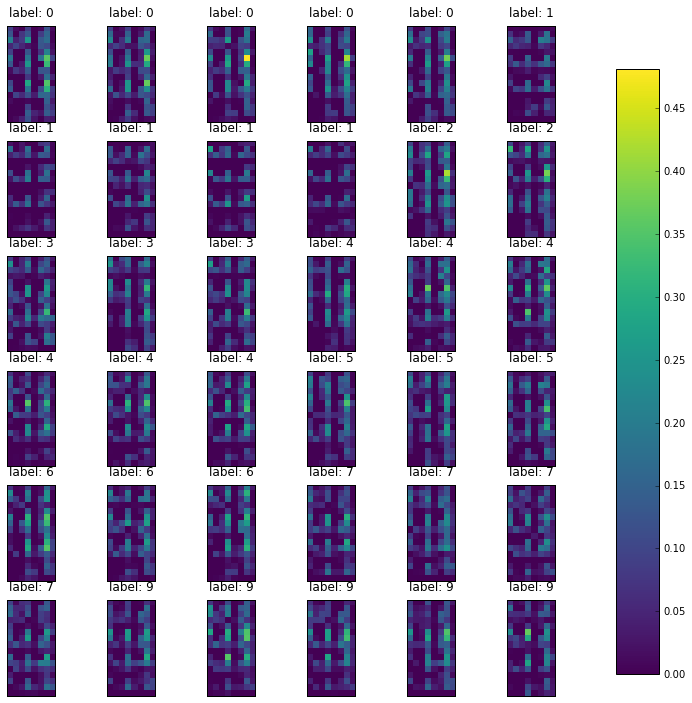

In [17]:
plot_encoded(scenc_pred, all_labels, n = 36, sorted_labels=True, max_img_cols=6)

Let's generate the "archetypes" for each label by averaging over the test data.

In [18]:
scenc_archetypes = [scenc_pred[all_labels==j].mean(axis=0)[np.newaxis, ...] for j in range(10)]
scenc_archetypes = np.concatenate(scenc_archetypes)

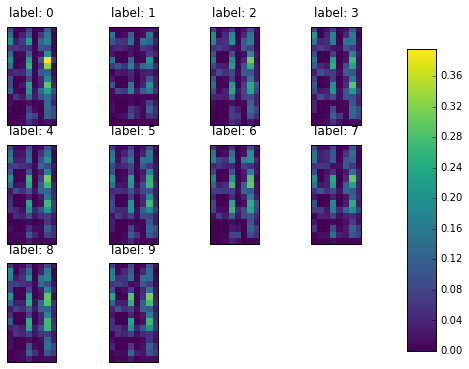

In [19]:
plot_encoded(scenc_archetypes, [j for j in range(10)])

In [20]:
scenc_differences = []
scenc_differences_lab = []
for j, at1 in enumerate(scenc_archetypes):
    for k, at2 in enumerate(scenc_archetypes):
        scenc_differences.append((np.abs(at1 - at2)**2)[np.newaxis, ...])
        scenc_differences_lab.append((j,k))

scenc_differences = np.concatenate(scenc_differences)
scenc_differences_lab = np.array(scenc_differences_lab)

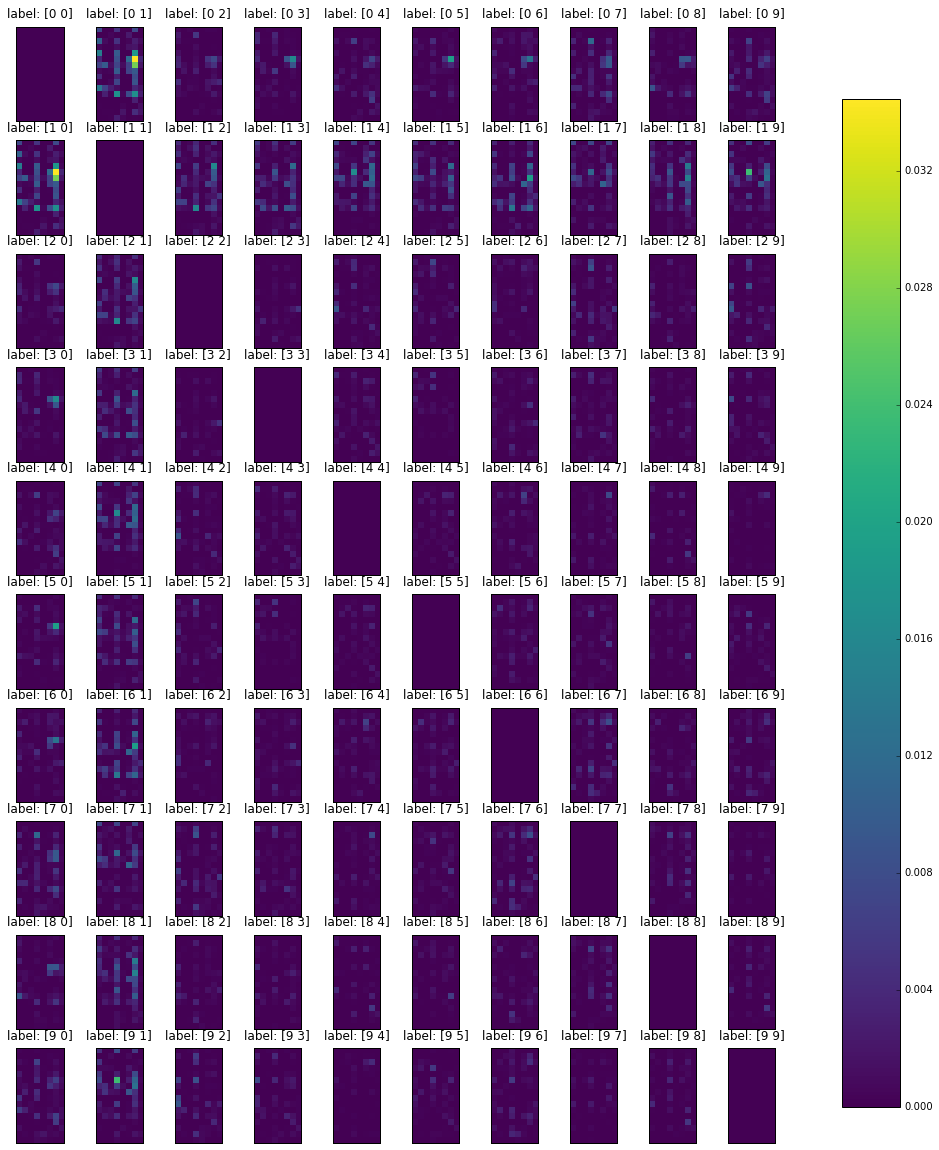

In [21]:
plot_encoded(scenc_differences, scenc_differences_lab, max_img_cols=10)

There's one pixel in particular that seems to determine the difference between the average 0 and the average 8; likewise for the 0 and 9; and the 8 and 9. Let's see if we can visualize what it encodes for. 

In [22]:
def get_difference_label(lab, i, j):
    return (lab[:, 0] == i) & (lab[:, 1] == j)

label_0_1 = get_difference_label(scenc_differences_lab, 0, 1)
label_0_8 = get_difference_label(scenc_differences_lab, 0, 8)
label_0_9 = get_difference_label(scenc_differences_lab, 0, 9)
label_8_9 = get_difference_label(scenc_differences_lab, 8, 9)

scenc_0_1 = scenc_differences[label_0_1, ...]
scenc_0_8 = scenc_differences[label_0_8, ...]
scenc_0_9 = scenc_differences[label_0_9, ...]
scenc_8_9 = scenc_differences[label_8_9, ...]

In [23]:
from functools import reduce
print('largest unnormalized value in arrays is {:4.3g}'.format(reduce(np.maximum,
                                                                 map(lambda x: np.max(np.sqrt(x)),
                                                                     (scenc_0_1, scenc_0_8, scenc_0_9, scenc_8_9)))))

largest unnormalized value in arrays is 0.186


In [24]:
scdec_0189 = scdec.predict(np.concatenate([scenc_0_1, scenc_0_8, scenc_0_9, scenc_8_9]))

In [25]:
scdec_archetypes = scdec.predict(scenc_archetypes)

In [56]:
scdec_test = scdec.predict(scenc_pred[:10, ...])

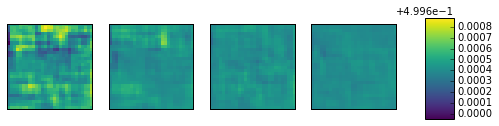

In [28]:
plot_decoded(scdec_0189)